#**Import required libraries**

In [51]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#**Loading the dataset**

In [52]:
# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)  # Make y 2D for regression

# Convert to DataFrame for viewing
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **Standardizing the features**

In [53]:
# Standardize features
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

#**Splitting the set into Train and Test**

In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Defining Multilayer Perceptron (MLP) class**

In [55]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Weight initialization
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias2 = np.zeros((1, output_size))

    def forward(self, X):
        # Hidden layer (ReLU)
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = np.maximum(0, self.z1)
        # Output layer (Linear)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        return self.z2

    def backward(self, X, y, output, learning_rate):
        m = X.shape[0]
        # Loss derivative
        d_loss_output = (output - y) / m
        # Backprop output -> hidden
        d_weights2 = np.dot(self.a1.T, d_loss_output)
        d_bias2 = np.sum(d_loss_output, axis=0, keepdims=True)
        # Backprop hidden -> input (ReLU derivative)
        d_a1 = np.dot(d_loss_output, self.weights2.T)
        d_z1 = d_a1 * (self.z1 > 0)
        d_weights1 = np.dot(X.T, d_z1)
        d_bias1 = np.sum(d_z1, axis=0, keepdims=True)
        # Update weights
        self.weights1 -= learning_rate * d_weights1
        self.bias1 -= learning_rate * d_bias1
        self.weights2 -= learning_rate * d_weights2
        self.bias2 -= learning_rate * d_bias2

    def train(self, X, y, learning_rate, epochs):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            self.backward(X, y, output, learning_rate)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
        return losses

    def predict(self, X):
        return self.forward(X)

#**Training the model**

In [88]:
# Create and train model
model = MLP(input_size=X_train.shape[1], hidden_size=64, output_size=1)
losses = model.train(X_train, y_train, learning_rate=0.01, epochs=250)

# Predictions
y_pred = model.predict(X_test)

# Reverse scaling for metrics
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"\nMSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

Epoch 0, Loss: 1.002408
Epoch 10, Loss: 1.002067
Epoch 20, Loss: 1.001715
Epoch 30, Loss: 1.001348
Epoch 40, Loss: 1.000962
Epoch 50, Loss: 1.000553
Epoch 60, Loss: 1.000117
Epoch 70, Loss: 0.999647
Epoch 80, Loss: 0.999140
Epoch 90, Loss: 0.998590
Epoch 100, Loss: 0.997990
Epoch 110, Loss: 0.997335
Epoch 120, Loss: 0.996618
Epoch 130, Loss: 0.995832
Epoch 140, Loss: 0.994967
Epoch 150, Loss: 0.994017
Epoch 160, Loss: 0.992970
Epoch 170, Loss: 0.991816
Epoch 180, Loss: 0.990543
Epoch 190, Loss: 0.989140
Epoch 200, Loss: 0.987592
Epoch 210, Loss: 0.985886
Epoch 220, Loss: 0.984004
Epoch 230, Loss: 0.981929
Epoch 240, Loss: 0.979642

MSE: 1.2765
MAE: 0.8947
R²: 0.0259


#**Data Visualizations**


**1.   Loss Curve**



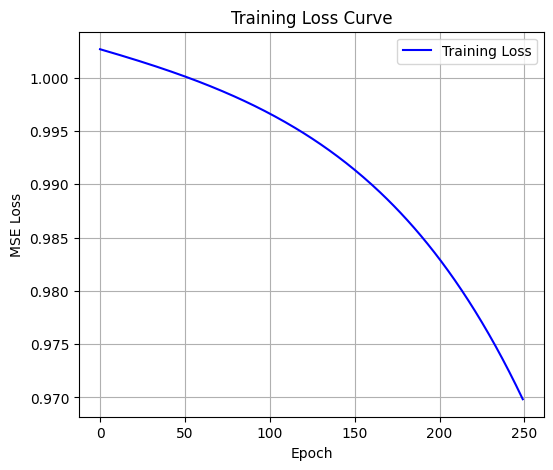

In [81]:
# 1. Loss Curve
plt.figure(figsize=(6, 5))
plt.plot(losses, label="Training Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

**2. Actual vs Predicted**

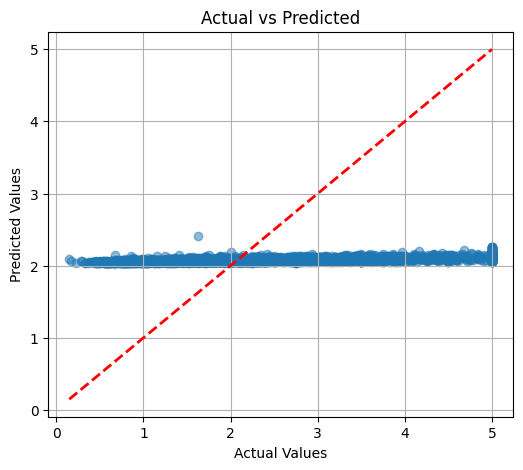

In [83]:
# 2. Actual vs Predicted
plt.figure(figsize=(6, 5))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.5)
plt.plot([y_test_inv.min(), y_test_inv.max()],
         [y_test_inv.min(), y_test_inv.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

**3. Residuals Distribution**

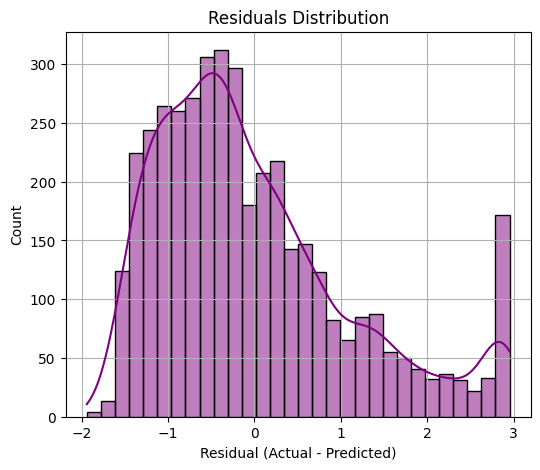

In [87]:
# 3. Residuals Distribution
residuals = y_test_inv.flatten() - y_pred_inv.flatten()
plt.figure(figsize=(6, 5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.xlabel("Residual (Actual - Predicted)")
plt.title("Residuals Distribution")
plt.grid(True)
plt.show()

**4. Feature Importance Proxy**

/tmp/ipython-input-2035651848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_names, y=feature_importance, palette="viridis")


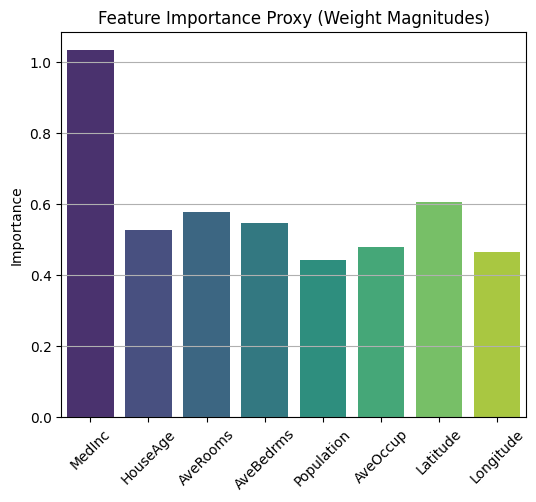

In [86]:
# 4. Feature Importance Proxy
feature_importance = np.sum(np.abs(model.weights1), axis=1)
feature_names = data.feature_names
plt.figure(figsize=(6, 5))
sns.barplot(x=feature_names, y=feature_importance, palette="viridis")
plt.title("Feature Importance Proxy (Weight Magnitudes)")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()